In [176]:
import pandas as pd
from nltk import tokenize
import re
import nltk
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import unidecode
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [177]:
df = pd.read_csv('avida/entrevista.csv')

In [178]:
cols = ['datetime', 'genero', 'idade', 'nada', 'grupo']
df.columns = [*cols, *np.arange(1, 31)]

In [179]:
df.head()

,datetime,genero,idade,nada,grupo,1,2,3,4,5,...,21,22,23,24,25,26,27,28,29,30
0,16/10/2019 13:30:47,Feminino,30 - 35 anos,NaN,Paciente sem plano de saúde privado (SUS / par...,Dr Consulta,9.0,"8.5 Tem que investir menos, consegue agendar r...","Agilidade atendimento, agilidade agendamento e...",Falta de um Hospital e precisar ir para o púb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16/10/2019 13:57:17,Masculino,36 - 41 anos,NaN,Profissional de saúde,NaN,NaN,NaN,NaN,NaN,...,Trabalhou com hemoterapia no ambiente público ...,NaN,Retorno do paciente para o profissional; ningu...,Esperaria que convênios e hospitais resolvesse...,Triagem bem feita e mais imediata possível - i...,"qualidade atendimento ao paciente, uso mais co...",Informações para pacientes para exames periódi...,tipo de hemocomponente o paciente precisa - en...,Einstein - prontuário eletrônicos; públicos e ...,"Einstein não fazia uso, apesar de serem inovad..."
2,16/10/2019 15:45:49,Feminino,30 - 35 anos,NaN,Profissional de saúde,NaN,NaN,NaN,NaN,NaN,...,público - acesso universal e gratuito. defenso...,"Principais problemas: estrutura, superlotação ...",Saúde é um direito humano - ter acesso à saúde...,NaN,NaN,Diminuição da congestão do sistema é um reflex...,"Sistema funcionando em rede, pautado na Atençã...",Obstáculos para cuidado dos pacientes: falta d...,Gestão de dados clínicos no SUS não é padroniz...,Enfermagem não é uma categoria que tem muita f...
3,16/10/2019 18:09:08,Masculino,30 - 35 anos,NaN,Paciente com plano de saúde privado,Cruz azul - plano hospital particular (fica no...,9.0,Muito superior à saúde pública e preço não é r...,Exames e atenção ao pronto atendimento. Quando...,"Carências longas - exames de imagem 6 meses, i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/10/2019 22:56:48,Masculino,30 - 35 anos,NaN,Paciente com plano de saúde privado,Bradesco,7.0,Planos são caros e não dão acesso a serviços i...,"Internação, PA, exames de imagem. Quando preci...",Consultas e exames especializadas. Ex: psicólo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
df.shape

(25, 35)

In [181]:
df.fillna('', inplace = True)

In [182]:
df['texto'] = df.iloc[:, 5:26].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [183]:
df['texto'] = df['texto'].apply(
    lambda s: ''.join(c for c in s if c not in string.punctuation)
)

In [184]:
df['texto'] = df['texto'].apply(
    lambda s: ''.join(c for c in s if not c.isdigit())
)

In [185]:
df['texto']= df['texto'].apply(unidecode.unidecode)

In [186]:
df['texto'] = df['texto'].str.lower()

In [187]:
token = tokenize.WordPunctTokenizer()

stopwords = nltk.corpus.stopwords.words("portuguese")

df['texto'] = df['texto'].apply(token.tokenize).apply(
    lambda x: [i for i in x if i not in stopwords]
).apply(' '.join)

df['texto']

0     dr consulta investir menos consegue agendar ra...
1     trabalhou hemoterapia ambiente publico privado...
2     publico acesso universal gratuito defensora su...
3     cruz azul plano hospital particular fica ipira...
4     bradesco planos sao caros nao dao acesso servi...
5     bem atendido sus atendido rapido clinico agend...
6     bradesco plano saude cobertura boa raros medic...
7     tempo atendimento varia bastante setor privado...
8     organizado acesso diagnosticos tratamento rapi...
9     atencao paciente cordialidade melhor desempenh...
10    publico conseguiram abrangencia maior algumas ...
11    demorado agendar consulta especialista clinico...
12    precisa usa atendimento particular sistema pri...
13    maior interesse resolver interesse paciente pu...
14    porto seguro ams petrobras categoria doenca de...
15    servidora comissionada acesso hospital servido...
16    pq nao medico demora atendimento ate horas ser...
17    greeline parece medicos profissionais nao 

In [210]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=['dtype', 'Name', 'object', 'texto'],
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=70
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(16, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

# WordCloud com todos os entrevistados

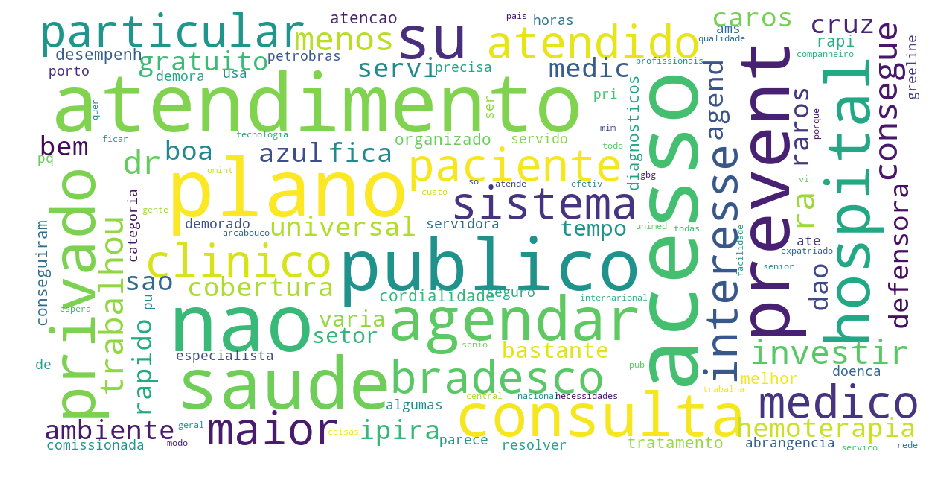

In [211]:
show_wordcloud(df['texto'])

In [212]:
df.iloc[:, 4].value_counts()

Paciente com plano de saúde privado                                                                                                   11
Profissional de saúde                                                                                                                  8
Paciente sem plano de saúde privado (SUS / particular)                                                                                 5
Faz pouco mais de 1 mês que voltou a ter plano. Nos últimos 7 anos foi usuária do SUS. De 2016 pra cá começou a usar Dr. Consulta      1
Name: grupo, dtype: int64

In [213]:
pac_com_plano = df.loc[df["grupo"] == "Paciente com plano de saúde privado"]
pac_sem_plano = df.loc[df["grupo"] == "Paciente sem plano de saúde privado (SUS / particular)"]
profis = df.loc[df["grupo"] == "Profissional de saúde"]

print(pac_com_plano.shape)
print(pac_sem_plano.shape)
print(profis.shape)

(11, 36)
(5, 36)
(8, 36)


# WordCloud dos pacientes com plano de saúde

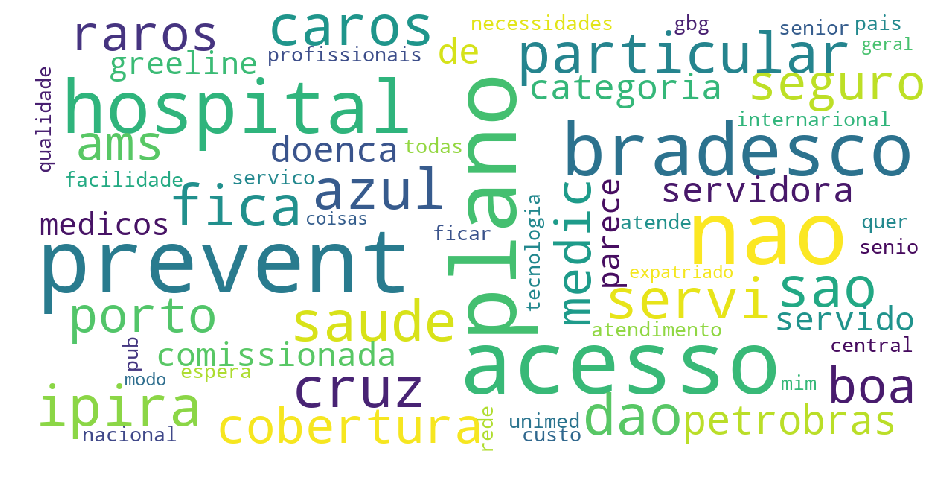

In [214]:
show_wordcloud(pac_com_plano['texto'])

# WordCloud dos pacientes sem plano de saúde

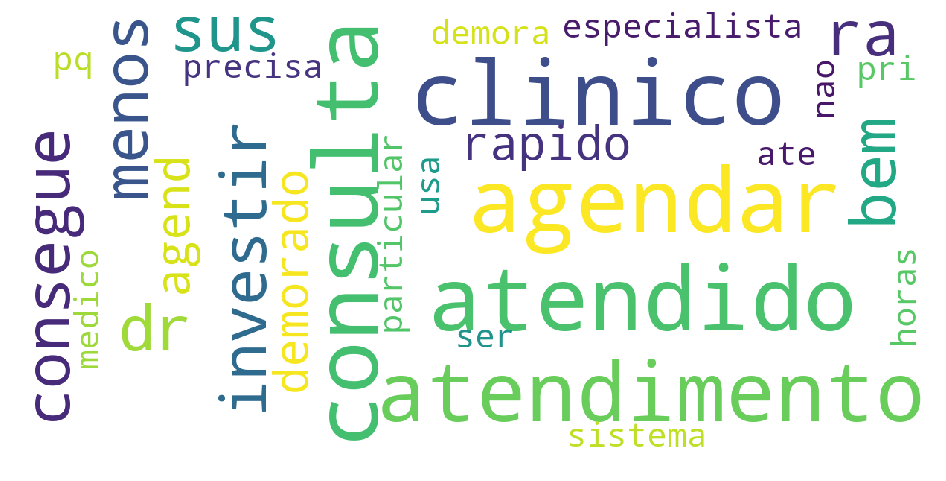

In [215]:
show_wordcloud(pac_sem_plano['texto'])

# WordCloud dos profissionais de saúde

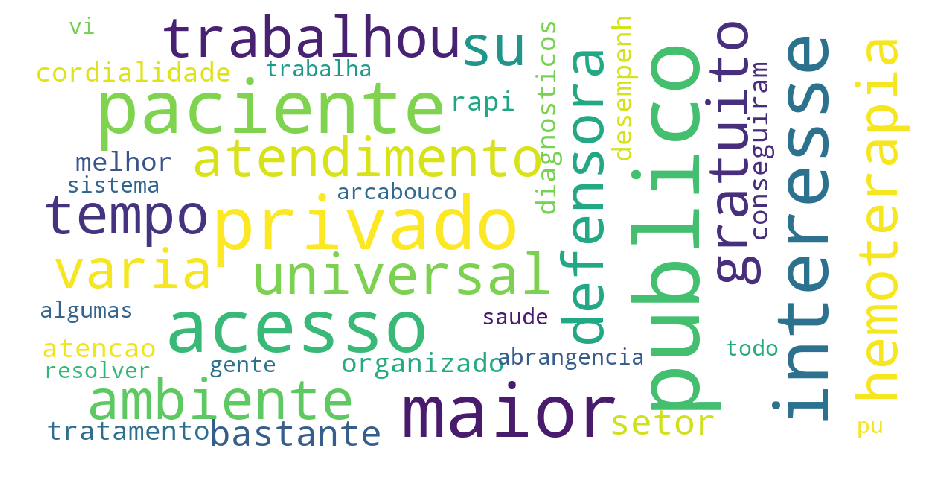

In [216]:
show_wordcloud(profis['texto'])